In [1]:
from lsmulator import *
from workloads import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *

In [2]:
workload_classes = [RoundRobinWorkload, ZipfWorkload, MultinomialWorkload, TimeDecayBetaMultWorkload]
workloads = [wlk().generate() for wlk in workload_classes]

In [8]:
opts1 = {'cache_size': 25, 'layer_size': 100, 'layer_ratio': 2, 'bloom_bit_length': 10, 'bloom_hash_count': 5}
opts2 = {'cache_size': 50, 'layer_size': 75, 'layer_ratio': 2, 'bloom_bit_length': 10, 'bloom_hash_count': 5}
opts3 = {'cache_size': 50, 'layer_size': 50, 'layer_ratio': 2, 'bloom_bit_length': 20, 'bloom_hash_count': 5}
allopts = [opts1, opts2, opts3]

In [5]:
trees = [[lsmulate(workload, **opts) for opts in allopts] for workload in workloads]

In [12]:
def plot_tree(lsmtree):
  layers = lsmtree.layers()
  plt.ylim(-0.1, 1.1)
  plt.ylabel('Hit Frequency')
  plt.xlabel('Layer Number')
  plt.xticks(range(len(layers)))
  plt.plot(range(len(layers)), [l.hit_frequency() for l in layers], label='Layers')
  plt.axhline(lsmtree.cache.hit_frequency(), label='Cache', color='red', ls='--')
  plt.legend(loc='best')

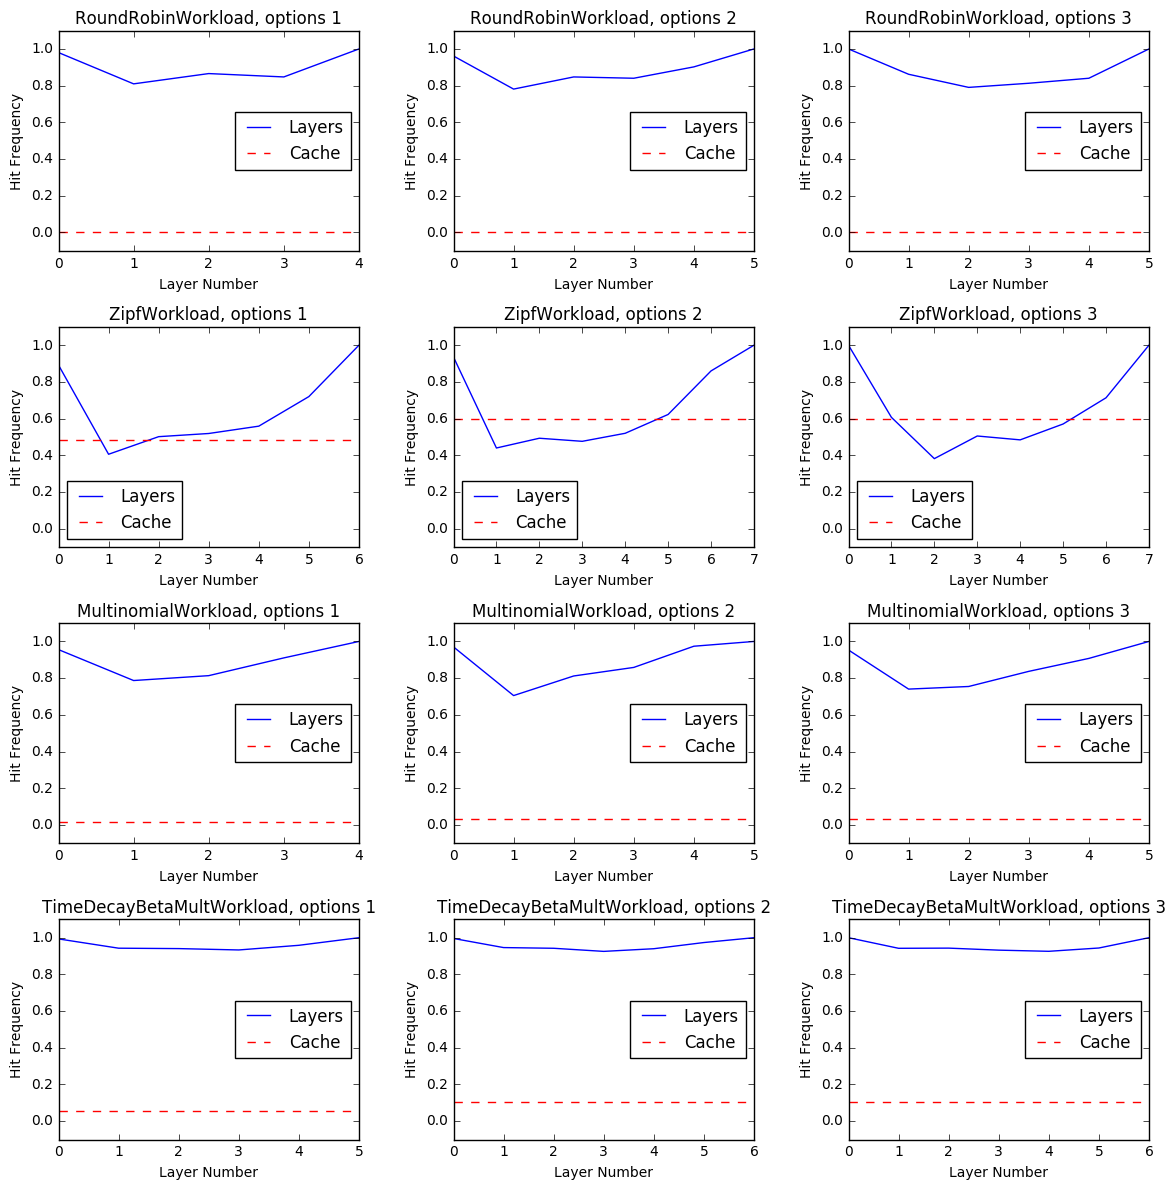

In [13]:
with figure_grid(len(workloads), len(allopts)) as g:
  for i in range(len(workloads)):
    for j in range(len(allopts)):
      g.next()
      plt.title('{}, options {}'.format(workload_classes[i].__name__, j+1))
      plot_tree(trees[i][j])